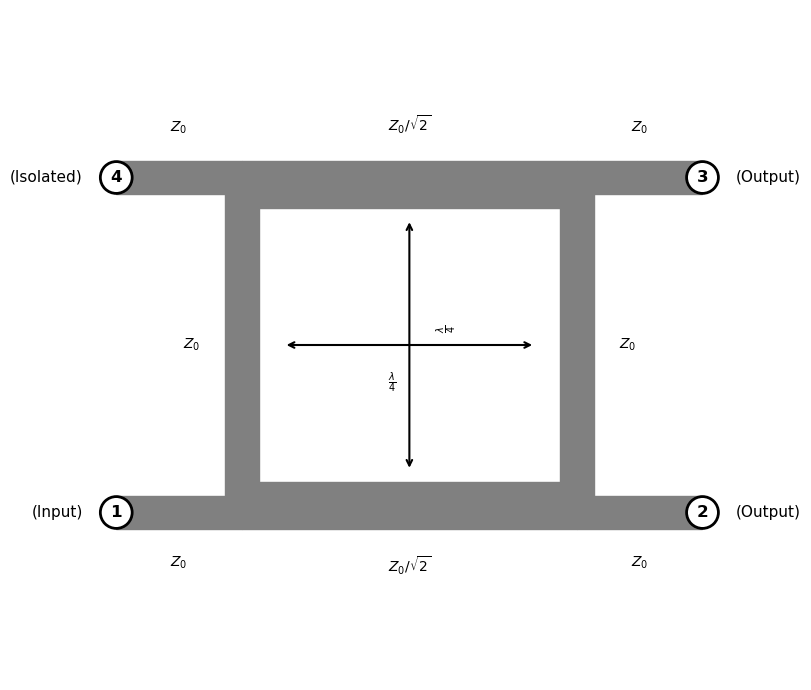

In [2]:
# bron: https://github.com/iic-jku/radio-frequency-integrated-circuits/blob/main/content/mixer/_fig_branch_line_coupler.qmd

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Create figure and axis
fig, ax = plt.subplots(1, 1, figsize=(8, 7))

# Define dimensions and positions
line_length = 4
line_width = 0.4
stub_length = 1.5
port_radius = 0.19

# Define colors
line_color = '#808080'      # Gray for transmission lines
text_color = 'black'
port_color = 'white'
port_edge_color = 'black'

# Draw the four transmission line segments
# Bottom line (Z0/√2) - wider for lower impedance
bottom_rect = patches.Rectangle(
    (0, -line_width/2), 
    line_length, 
    line_width * np.sqrt(2), 
    facecolor=line_color, 
    edgecolor=line_color, 
    linewidth=1
)
ax.add_patch(bottom_rect)

# Right line (Z0) - standard width
right_rect = patches.Rectangle(
    (line_length - line_width/2, 0), 
    line_width, 
    line_length, 
    facecolor=line_color, 
    edgecolor=line_color, 
    linewidth=1
)
ax.add_patch(right_rect)

# Top line (Z0/√2) - wider for lower impedance
top_rect = patches.Rectangle(
    (0, line_length - line_width*np.sqrt(2) + line_width/2), 
    line_length, 
    line_width * np.sqrt(2), 
    facecolor=line_color, 
    edgecolor=line_color, 
    linewidth=1
)
ax.add_patch(top_rect)

# Left line (Z0) - standard width
left_rect = patches.Rectangle(
    (-line_width/2, 0), 
    line_width, 
    line_length, 
    facecolor=line_color, 
    edgecolor=line_color, 
    linewidth=1
)
ax.add_patch(left_rect)

# Draw port stubs extending outward
# Port 1 stub (bottom left)
port1_stub = patches.Rectangle(
    (-stub_length, -line_width/2), 
    stub_length, 
    line_width, 
    facecolor=line_color, 
    edgecolor=line_color, 
    linewidth=1
)
ax.add_patch(port1_stub)

# Port 2 stub (bottom right)
port2_stub = patches.Rectangle(
    (line_length, -line_width/2), 
    stub_length, 
    line_width, 
    facecolor=line_color, 
    edgecolor=line_color, 
    linewidth=1
)
ax.add_patch(port2_stub)

# Port 3 stub (top right)
port3_stub = patches.Rectangle(
    (line_length, line_length - line_width/2), 
    stub_length, 
    line_width, 
    facecolor=line_color, 
    edgecolor=line_color, 
    linewidth=1
)
ax.add_patch(port3_stub)

# Port 4 stub (top left)
port4_stub = patches.Rectangle(
    (-stub_length, line_length - line_width/2), 
    stub_length, 
    line_width, 
    facecolor=line_color, 
    edgecolor=line_color, 
    linewidth=1
)
ax.add_patch(port4_stub)

# Draw port circles and labels
ports = {
    1: (-stub_length, 0, '(Input)'),
    2: (line_length + stub_length, 0, '(Output)'),
    3: (line_length + stub_length, line_length, '(Output)'),
    4: (-stub_length, line_length, '(Isolated)')
}

for port_num, (x, y, label) in ports.items():
    # Draw port circle
    port_circle = patches.Circle(
        (x, y), 
        port_radius, 
        facecolor=port_color, 
        edgecolor=port_edge_color, 
        linewidth=2
    )
    ax.add_patch(port_circle)
    
    # Add port number inside circle
    ax.text(x, y, str(port_num), ha='center', va='center', 
            color=text_color, fontsize=12, fontweight='bold')
    
    # Add port label outside circle
    if port_num in [1, 4]:  # Left side ports
        ax.text(x - 0.4, y, label, ha='right', va='center', 
                color=text_color, fontsize=11)
    else:  # Right side ports
        ax.text(x + 0.4, y, label, ha='left', va='center', 
                color=text_color, fontsize=11)

# Add characteristic impedance labels for main segments
# Bottom line (Z0/√2)
ax.text(line_length/2, -0.5, r'$Z_0/\sqrt{2}$', 
        ha='center', va='top', color=text_color)

# Right line (Z0)
ax.text(line_length + 0.5, line_length/2, r'$Z_0$', 
        ha='left', va='center', color=text_color)

# Top line (Z0/√2)
ax.text(line_length/2, line_length + 0.5, r'$Z_0/\sqrt{2}$', 
        ha='center', va='bottom', color=text_color)

# Left line (Z0)
ax.text(-0.5, line_length/2, r'$Z_0$', 
        ha='right', va='center', color=text_color)

# Add Z0 labels for port stubs
ax.text(-stub_length/2, -0.5, r'$Z_0$', 
        ha='center', va='top', color=text_color, fontsize=10)
ax.text(line_length + stub_length/2, -0.5, r'$Z_0$', 
        ha='center', va='top', color=text_color, fontsize=10)
ax.text(line_length + stub_length/2, line_length + 0.5, r'$Z_0$', 
        ha='center', va='bottom', color=text_color, fontsize=10)
ax.text(-stub_length/2, line_length + 0.5, r'$Z_0$', 
        ha='center', va='bottom', color=text_color, fontsize=10)

# Add λ/4 dimension arrows and labels in the center
center_x = line_length / 2
center_y = line_length / 2

# Horizontal arrow for λ/4 length
ax.annotate('', 
            xy=(center_x + 1.5, center_y), 
            xytext=(center_x - 1.5, center_y),
            arrowprops=dict(arrowstyle='<->', color='black', lw=1.5))
ax.text(center_x - 0.2, center_y - 0.3, r'$\frac{\lambda}{4}$', 
        ha='center', va='top', color=text_color)

# Vertical arrow for λ/4 length
ax.annotate('', 
            xy=(center_x, center_y + 1.5), 
            xytext=(center_x, center_y - 1.5),
            arrowprops=dict(arrowstyle='<->', color='black', lw=1.5))
ax.text(center_x + 0.3, center_y + 0.2, r'$\frac{\lambda}{4}$', 
        ha='left', va='center', color=text_color, rotation=90)

# Set axis properties
ax.set_xlim(-2, line_length + 2.5)
ax.set_ylim(-2, line_length + 2)
ax.set_aspect('equal')
ax.axis('off')

# Apply tight layout and show
plt.tight_layout()